# Load libraries

In [5]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns

# Load data and convert to pandas

In [7]:
# Load stores data
with open('PetReg/stores.json', 'r') as f:
    stores_data = json.load(f)

# Load pets data
with open('PetReg/pets.json', 'r') as f:
    pets_data = json.load(f)

# Convert the JSON data into pandas DataFrames
stores_df = pd.DataFrame(stores_data)
pets_df = pd.DataFrame(pets_data)

# Stores: Reporting data analysis


Stores Data Summary:
             id      petId   quantity
count  50.00000   50.00000  50.000000
mean   25.50000  125.50000   5.000000
std    14.57738   14.57738   2.725541
min     1.00000  101.00000   1.000000
25%    13.25000  113.25000   3.000000
50%    25.50000  125.50000   5.000000
75%    37.75000  137.75000   7.000000
max    50.00000  150.00000  10.000000

Order Status Distribution:
status
placed       17
approved     17
delivered    16
Name: count, dtype: int64


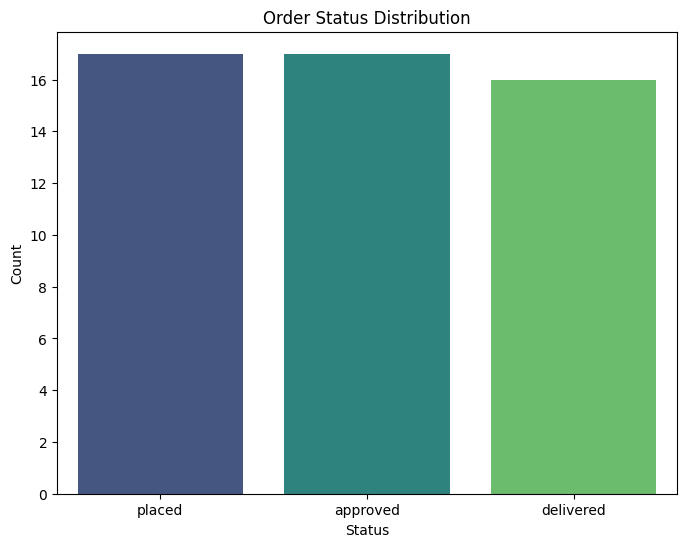

In [13]:
# Descriptive statistics for stores dataset
print("\nStores Data Summary:")
print(stores_df.describe())

# Count the number of orders by status
order_status_counts = stores_df['status'].value_counts()
print("\nOrder Status Distribution:")
print(order_status_counts)

# Plot order status distribution
plt.figure(figsize=(8,6))
sns.countplot(x='status', data=stores_df, palette='viridis', hue='status', legend=False)
plt.title('Order Status Distribution')
plt.xlabel('Status')
plt.ylabel('Count')
plt.show()

# Pets: Reporting data analysis


Pets Data Summary:
              id
count   50.00000
mean   125.50000
std     14.57738
min    101.00000
25%    113.25000
50%    125.50000
75%    137.75000
max    150.00000

Pet Status Distribution:
status
available    26
sold         24
Name: count, dtype: int64

Pet Category Distribution:
category
dog    25
cat    25
Name: count, dtype: int64


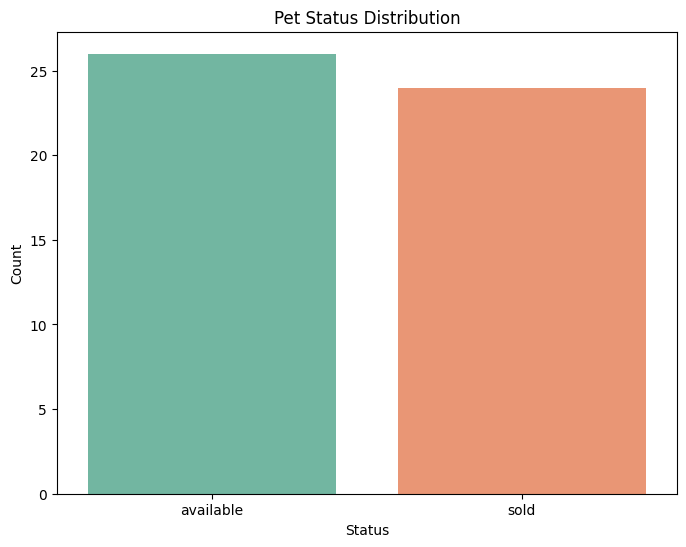

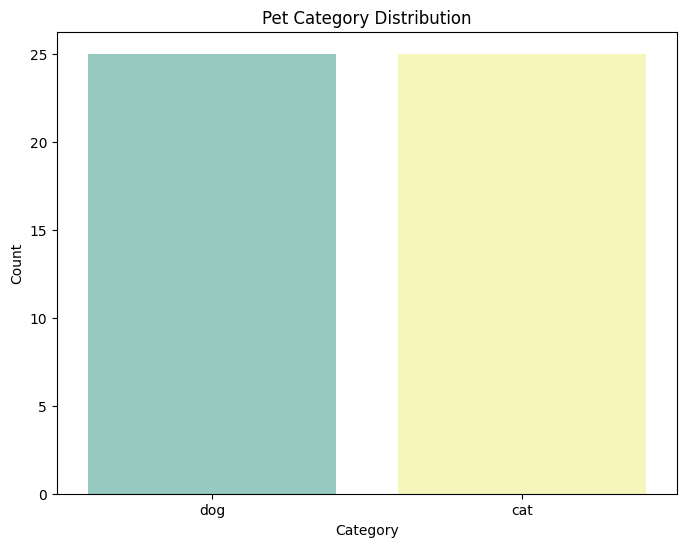

In [18]:
# Descriptive statistics for pets dataset
print("\nPets Data Summary:")
print(pets_df.describe())

# Count the number of pets by status
pet_status_counts = pets_df['status'].value_counts()
print("\nPet Status Distribution:")
print(pet_status_counts)

# Count the number of pets by category
pet_category_counts = pets_df['category'].apply(lambda x: x['name']).value_counts()
print("\nPet Category Distribution:")
print(pet_category_counts)

# Visualize the pet status distribution
plt.figure(figsize=(8,6))
sns.countplot(x='status', data=pets_df, palette='Set2', hue='status', legend=False)
plt.title('Pet Status Distribution')
plt.xlabel('Status')
plt.ylabel('Count')
plt.show()

# Visualize the pet category distribution
plt.figure(figsize=(8,6))
sns.countplot(x=pets_df['category'].apply(lambda x: x['name']), palette='Set3', hue=pets_df['category'].apply(lambda x: x['name']), legend=False)
plt.title('Pet Category Distribution')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

# Pets and stores cross-analysis

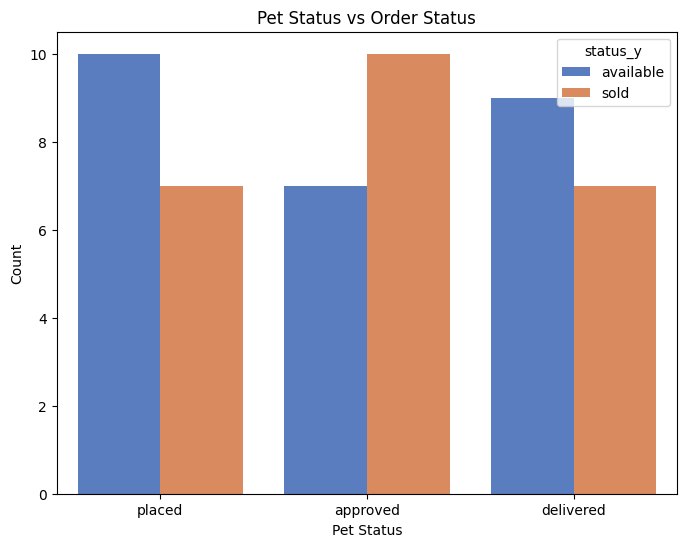

In [20]:
# Merge pets data with stores data based on petId to analyze relationships
merged_data = pd.merge(stores_df, pets_df, left_on='petId', right_on='id', how='inner')

# Visualize relationship between pet status and order status
plt.figure(figsize=(8,6))
sns.countplot(x='status_x', hue='status_y', data=merged_data, palette='muted')
plt.title('Pet Status vs Order Status')
plt.xlabel('Pet Status')
plt.ylabel('Count')
plt.show()